<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2021 Exam Coding 1
***

This exam coding segment is due on Canvas by **11:59 PM on Friday October 15*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  


Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted [here](https://drive.google.com/drive/folders/1Dl7ndZbcSZhIRM-1_OXXue5D8VgMd9NP?usp=sharing).  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [40 points] Problem 1: Working with Data

You've been hired as part of the data team for the hit new mobile game, *League of Fledglings*, where you choose an adorable baby animal as your avatar and wage "battles" with other players to determine who will rule over Baby Animal Farm.  Being a mobile game, *League of Fledglings* is highly monetized, and players are regularly encouraged to purchase access to *Fledgies*, which alter the appearance of your in-game avatar fledgling.  After all, why use a regular baby elephant when you could pay money to use a *chartreuse* baby elephant?  

After each game, players are asked to evaluate how much they enjoyed that game (on a scale of 1-10).  They are also presented with a link to a new *Fledgie* to consider purchasing.

In `pay2win.csv` your bosses have provided you with one month's player data.  Each of the 2430 rows are the data for a different user.  For each player, you have been provided with the following:

- Age: the player's self-reported age on account creation.
- Sex: the player's self-reported sex on account creation.  A "choose not to report/nonbinary" option is available.
- Interest: the player's median response to the "enjoyment" poll.
- Clicks: the number of times that month that the player clicked on the link to a new *Fledgie*.
- Purchased: the dollar amount purchased by the player that month.


In [2]:
df=pd.read_csv('../data/pay2win.csv')
df.head()

,Unnamed: 0,Age,Sex,Interest,Clicks,Purchased
0,0,63.865290,M,7.0,2,0.000000
1,1,47.618445,M,1.0,1,36.142801
2,3,67.354456,M,9.0,1,0.000000
3,4,53.581144,M,4.0,1,0.000000
4,5,51.136906,M,7.0,2,195.725535


**Part A:** Explore

Create histograms of each of the 5 columns.  For each variable, describe how many modes it has and if it's unimodal whether or not it exhibits any skewness (be careful with binning on `Purchased`).  Use `df.describe` to get an overall picture of the data.

Text(0.5, 1.0, 'Purchases')

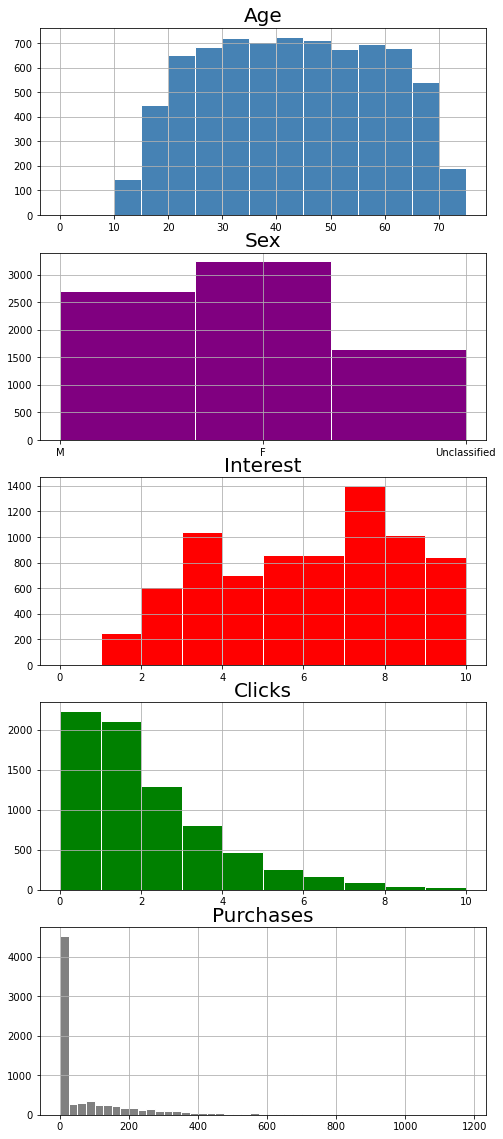

In [3]:
#make histograms, use describe

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,20))

df['Age'].hist(bins=range(0,80,5), ax=axes[0],facecolor="steelblue",edgecolor="white")
axes[0].set_title("Age", fontsize=20)

df['Sex'].hist(bins=3, ax=axes[1],facecolor="purple",edgecolor="white")
axes[1].set_title("Sex", fontsize=20)

df['Interest'].hist(bins=range(0,11,1), ax=axes[2],facecolor="red",edgecolor="white")
axes[2].set_title("Interest", fontsize=20)

df['Clicks'].hist(bins=range(0,11,1), ax=axes[3],facecolor="green",edgecolor="white")
axes[3].set_title("Clicks", fontsize=20)

df['Purchased'].hist(bins=range(0,1200,25), ax=axes[4],facecolor="grey",edgecolor="white")
axes[4].set_title("Purchases", fontsize=20)



Age: The ages are pretty evenly distributed, evenly skewed.

Sex: It's hard to say what kind of skew this data has since M/F/U have no numerical value, but we can say that there are more females than males and unclassified playing.

Interest:  This data is left skewed and bimodal, where there are two peaks in the frequency of the data.  At 3-4, and at 7-8.  

Clicks: This is clearly a right skewed data set with one mode at 0-1.

Purchases: This is also right skewed but put to a much higher degree, the mean of the data is likely in the first 3 bins with one mode clearly in the first bin.


**Part B:** Shape

The data provided is *simulated*; Zach will share the code used to generate it with the solutions.  Many in-class distributions were used to create the data!  In particular:

- (i) One column was created with a uniform random variable.
- (ii) Another column was created with `stats.poisson.rvs`
- (iii) One column was created by summing a number of `stats.expon.rvs`

Based on the data provided, which columns could have been made by the functions in (i)-(iii)?

i)  The best assumption is going to have to be for age from ~8-72,  the extra data outside of the larger bins implies that less old people and young people play the game, but this can just be explained with the ages of 8/9 and 71/72 being represented by large bins.  Outside of that data, it's very uniform and much more uniform than the other peices of data.


ii)  The data that fits a poison distribution the best is going to be Clicks,  this makes sense, a very large amount of people are going to accedentally click on the buy page and a given amount are going to continue to click it to actually purchase, giving off that tail that we see with the right skew.

iii) The Exponential distribution is clealy showed in Purchases, where the number of 0-50 are incredibly high and durastically decrease.  Leaving a very large tail that fits with an exponential function.

**Part C:** Analyze relationships

Management wants to know how their surveys are useful in determining either clicks or purchases, and how their clicks are converted into sales.  To that end, create the following plots:
- A line plot that shows survey score versus mean purchase values for that interest level
- A pair of overlayed density histograms that show the purchase values of customers that return survery values of 5 or less against those that return survery values of 6 or more.
- A scatter plot that shows clicks versus purchase values 

Tell management if there appears to be a visual relationship between survey results and purchases.

Text(0, 0.5, 'Purchase Value')

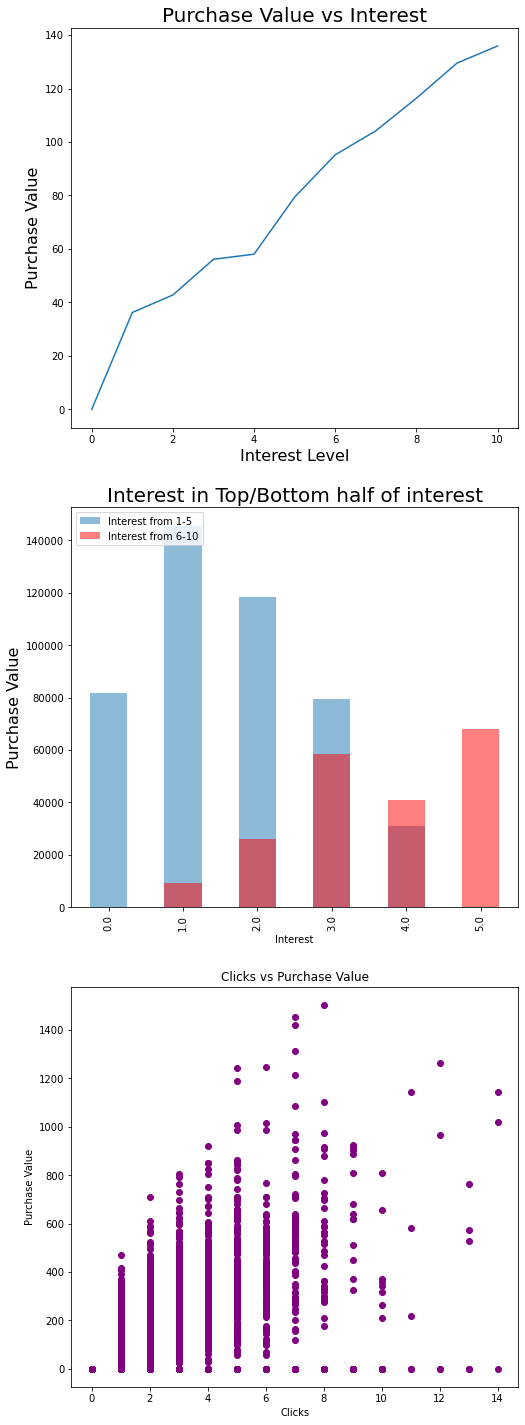

In [4]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(8,25))

df['Purchased'].groupby(df['Interest']).mean().plot(ax=axis[0])
axis[0].set_title("Purchase Value vs Interest", fontsize=20)
axis[0].set_xlabel("Interest Level", fontsize=16)
axis[0].set_ylabel("Purchase Value", fontsize=16)


d = df.loc[df['Interest'] >= 6]
d['Purchased'].groupby(df['Interest']).sum().plot.bar(ax=axis[1], alpha=.5)
#d['Purchased'].groupby(df['Interest']).hist(ax=axis[1],alpha=.5,edgecolor='white')

d2 = df.loc[df['Interest'] <= 5]
d2['Purchased'].groupby(df['Interest']).sum().plot.bar(ax=axis[1], color = "red", alpha=.5)



axis[1].set_title("Interest in Top/Bottom half of interest", fontsize=20)
axis[1].set_ylabel("Purchase Value", fontsize=16)
axis[1].legend(["Interest from 1-5","Interest from 6-10"],loc=2)




axis[2] = plt.scatter(df["Clicks"], df['Purchased'], color = "Purple")
plt.title("Clicks vs Purchase Value")
plt.xlabel("Clicks")
plt.ylabel("Purchase Value")

The relationship of Purchase value and Interest level is clearly a strong upwards trend.  This makes sense as people that are more invested into the game are more likely to purchase ingame content.

Again a strong upwards trend when it comes to Clicks vs Purchase value, as actually going through the action of purchasing a item requires clicks.  But something to notice is the consistant 0 purchases with many clicks, this could be explained by players wishing to buy something but backing out at the last moment.

**Part D:** Analyze *bands*

We want to keep our high-paying job in advertising technology (plus we get some free *Fledgies* each month, nice!), so we need to tell our bosses how well the ads are working, and who they are working on.  Player ages span from 8 years old to 78 years old.  Breaking down the data into **bands** of 10-years (e.g. $[8-18), [18-27.99), \dots [68-78]$) and split across the player's self-reported sex (3 possibilities).

Output the averages for interest, clicks, and purchases for each band as well as the average value of purchases-per-click.

In other words, report the requested averages
- For each Sex
- For each Age Band
- For each Sex+Age Band combination

In [5]:
#Make bands, and compute relevant stats for each
sexBandM = df.loc[df['Sex'] == "M"]
sexBandF = df.loc[df['Sex'] == "F"]
sexBandU = df.loc[df['Sex'] == "Unclassified"]

ageBand1 =  df[(df['Age'] >= 8) & (df['Age'] < 18)]
ageBand2 =  df[(df['Age'] >= 18) & (df['Age'] < 28)]
ageBand3 =  df[(df['Age'] >= 28) & (df['Age'] < 38)]
ageBand4 =  df[(df['Age'] >= 38) & (df['Age'] < 48)]
ageBand5 =  df[(df['Age'] >= 48) & (df['Age'] < 58)]
ageBand6 =  df[(df['Age'] >= 58) & (df['Age'] < 68)]
ageBand7 =  df[(df['Age'] >= 68) & (df['Age'] <= 78)]

BandM1 = ageBand1.loc[df['Sex'] == "M"]
BandM2 = ageBand2.loc[df['Sex'] == "M"]
BandM3 = ageBand3.loc[df['Sex'] == "M"]
BandM4 = ageBand4.loc[df['Sex'] == "M"]
BandM5 = ageBand5.loc[df['Sex'] == "M"]
BandM6 = ageBand6.loc[df['Sex'] == "M"]
BandM7 = ageBand7.loc[df['Sex'] == "M"]

BandF1 = ageBand1.loc[df['Sex'] == "F"]
BandF2 = ageBand2.loc[df['Sex'] == "F"]
BandF3 = ageBand3.loc[df['Sex'] == "F"]
BandF4 = ageBand4.loc[df['Sex'] == "F"]
BandF5 = ageBand5.loc[df['Sex'] == "F"]
BandF6 = ageBand6.loc[df['Sex'] == "F"]
BandF7 = ageBand7.loc[df['Sex'] == "F"]

BandU1 = ageBand1.loc[df['Sex'] == "Unclassified"]
BandU2 = ageBand2.loc[df['Sex'] == "Unclassified"]
BandU3 = ageBand3.loc[df['Sex'] == "Unclassified"]
BandU4 = ageBand4.loc[df['Sex'] == "Unclassified"]
BandU5 = ageBand5.loc[df['Sex'] == "Unclassified"]
BandU6 = ageBand6.loc[df['Sex'] == "Unclassified"]
BandU7 = ageBand7.loc[df['Sex'] == "Unclassified"]







print("Average Interest For all Men                       :" , sum(sexBandM['Interest'])/len(sexBandM['Interest']))
print("Average Interest For all Women                     :" , sum(sexBandF['Interest'])/len(sexBandF['Interest']))
print("Average Interest For all Unclassified              :" , sum(sexBandU['Interest'])/len(sexBandU['Interest']))
print()
print("Average Clicks For all Men                         :" , sum(sexBandM['Clicks'])/len(sexBandM['Clicks']))
print("Average Clicks For all Women                       :" , sum(sexBandF['Clicks'])/len(sexBandF['Clicks']))
print("Average Clicks For all Unclassified                :" , sum(sexBandU['Clicks'])/len(sexBandU['Clicks']))
print()
print("Average Purchases For all Men                      :" , sum(sexBandM['Purchased'])/len(sexBandM['Purchased']))
print("Average Purchases For all Women                    :" , sum(sexBandF['Purchased'])/len(sexBandF['Purchased']))
print("Average Purchases For all Unclassified             :" , sum(sexBandU['Purchased'])/len(sexBandU['Purchased']))
print()
print("Average Purchases Per Click For all Men            :" , (sum(sexBandM['Purchased'])/len(sexBandM['Purchased'])/(sum(sexBandM['Clicks'])/len(sexBandM['Clicks']))))
print("Average Purchases Per Click For all Women          :" , (sum(sexBandF['Purchased'])/len(sexBandF['Purchased'])/(sum(sexBandF['Clicks'])/len(sexBandF['Clicks']))))
print("Average Purchases Per Click For all Unclassified   :" , (sum(sexBandU['Purchased'])/len(sexBandU['Purchased'])/(sum(sexBandU['Clicks'])/len(sexBandU['Clicks']))))

print()
print()
print()

print("Average Interest For all 8-18                      :" , sum(ageBand1['Interest'])/len(ageBand1['Interest']))
print("Average Interest For all 18-28                     :" , sum(ageBand2['Interest'])/len(ageBand2['Interest']))
print("Average Interest For all 28-38                     :" , sum(ageBand3['Interest'])/len(ageBand3['Interest']))
print("Average Interest For all 38-48                     :" , sum(ageBand4['Interest'])/len(ageBand4['Interest']))
print("Average Interest For all 48-58                     :" , sum(ageBand5['Interest'])/len(ageBand5['Interest']))
print("Average Interest For all 58-68                     :" , sum(ageBand6['Interest'])/len(ageBand6['Interest']))
print("Average Interest For all 68-78                     :" , sum(ageBand7['Interest'])/len(ageBand7['Interest']))
print()
print("Average Clicks For all 8-18                        :" , sum(ageBand1['Clicks'])/len(ageBand1['Clicks']))
print("Average Clicks For all 18-28                       :" , sum(ageBand2['Clicks'])/len(ageBand2['Clicks']))
print("Average Clicks For all 28-38                       :" , sum(ageBand3['Clicks'])/len(ageBand3['Clicks']))
print("Average Clicks For all 38-48                       :" , sum(ageBand4['Clicks'])/len(ageBand4['Clicks']))
print("Average Clicks For all 48-58                       :" , sum(ageBand5['Clicks'])/len(ageBand5['Clicks']))
print("Average Clicks For all 58-68                       :" , sum(ageBand6['Clicks'])/len(ageBand6['Clicks']))
print("Average Clicks For all 68-78                       :" , sum(ageBand7['Clicks'])/len(ageBand7['Clicks']))
print()
print("Average Purchases For all 8-18                     :" , sum(ageBand1['Purchased'])/len(ageBand1['Purchased']))
print("Average Purchases For all 18-28                    :" , sum(ageBand2['Purchased'])/len(ageBand2['Purchased']))
print("Average Purchases For all 28-38                    :" , sum(ageBand3['Purchased'])/len(ageBand3['Purchased']))
print("Average Purchases For all 38-48                    :" , sum(ageBand4['Purchased'])/len(ageBand4['Purchased']))
print("Average Purchases For all 48-58                    :" , sum(ageBand5['Purchased'])/len(ageBand5['Purchased']))
print("Average Purchases For all 58-68                    :" , sum(ageBand6['Purchased'])/len(ageBand6['Purchased']))
print("Average Purchases For all 68-78                    :" , sum(ageBand7['Purchased'])/len(ageBand7['Purchased']))
print()
print("Average Purchases Per Click For all 8-18           :" , (sum(ageBand1['Purchased'])/len(ageBand1['Purchased'])/(sum(ageBand1['Clicks'])/len(ageBand1['Clicks']))))
print("Average Purchases Per Click For all 18-28          :" , (sum(ageBand2['Purchased'])/len(ageBand2['Purchased'])/(sum(ageBand2['Clicks'])/len(ageBand2['Clicks']))))
print("Average Purchases Per Click For all 28-38          :" , (sum(ageBand3['Purchased'])/len(ageBand3['Purchased'])/(sum(ageBand3['Clicks'])/len(ageBand3['Clicks']))))
print("Average Purchases Per Click For all 38-48          :" , (sum(ageBand4['Purchased'])/len(ageBand4['Purchased'])/(sum(ageBand4['Clicks'])/len(ageBand4['Clicks']))))
print("Average Purchases Per Click For all 48-58          :" , (sum(ageBand5['Purchased'])/len(ageBand5['Purchased'])/(sum(ageBand5['Clicks'])/len(ageBand5['Clicks']))))
print("Average Purchases Per Click For all 58-68          :" , (sum(ageBand6['Purchased'])/len(ageBand6['Purchased'])/(sum(ageBand6['Clicks'])/len(ageBand6['Clicks']))))
print("Average Purchases Per Click For all 68-78          :" , (sum(ageBand7['Purchased'])/len(ageBand7['Purchased'])/(sum(ageBand7['Clicks'])/len(ageBand7['Clicks']))))

print()
print()
print()

print("Average Interest For all M 8-18                    :" , BandM1['Interest'].mean())
print("Average Interest For all M 18-28                   :" , BandM2['Interest'].mean())
print("Average Interest For all M 28-38                   :" , BandM3['Interest'].mean())
print("Average Interest For all M 38-48                   :" , BandM4['Interest'].mean())
print("Average Interest For all M 48-58                   :" , BandM5['Interest'].mean())
print("Average Interest For all M 58-68                   :" , BandM6['Interest'].mean())
print("Average Interest For all M 68-78                   :" , BandM7['Interest'].mean())
print()
print("Average Clicks For all M 8-18                      :" , BandM1['Clicks'].mean())
print("Average Clicks For all M 18-28                     :" , BandM2['Clicks'].mean())
print("Average Clicks For all M 28-38                     :" , BandM3['Clicks'].mean())
print("Average Clicks For all M 38-48                     :" , BandM4['Clicks'].mean())
print("Average Clicks For all M 48-58                     :" , BandM5['Clicks'].mean())
print("Average Clicks For all M 58-68                     :" , BandM6['Clicks'].mean())
print("Average Clicks For all M 68-78                     :" , BandM7['Clicks'].mean())
print()
print("Average Purchased For all M 8-18                   :" , BandM1['Purchased'].mean())
print("Average Purchased For all M 18-28                  :" , BandM2['Purchased'].mean())
print("Average Purchased For all M 28-38                  :" , BandM3['Purchased'].mean())
print("Average Purchased For all M 38-48                  :" , BandM4['Purchased'].mean())
print("Average Purchased For all M 48-58                  :" , BandM5['Purchased'].mean())
print("Average Purchased For all M 58-68                  :" , BandM6['Purchased'].mean())
print("Average Purchased For all M 68-78                  :" , BandM7['Purchased'].mean())
print()
print("Average Purchases Per Click For all M 8-18         :" , (BandM1['Purchased'].mean()/BandM1['Clicks'].mean()))
print("Average Purchases Per Click For all M 18-28        :" , (BandM2['Purchased'].mean()/BandM2['Clicks'].mean()))
print("Average Purchases Per Click For all M 28-38        :" , (BandM3['Purchased'].mean()/BandM3['Clicks'].mean()))
print("Average Purchases Per Click For all M 38-48        :" , (BandM4['Purchased'].mean()/BandM4['Clicks'].mean()))
print("Average Purchases Per Click For all M 48-58        :" , (BandM5['Purchased'].mean()/BandM5['Clicks'].mean()))
print("Average Purchases Per Click For all M 58-68        :" , (BandM6['Purchased'].mean()/BandM6['Clicks'].mean()))
print("Average Purchases Per Click For all M 68-78        :" , (BandM7['Purchased'].mean()/BandM7['Clicks'].mean()))

print()
print()
print()

print("Average Interest For all F 8-18                    :" , BandF1['Interest'].mean())
print("Average Interest For all F 18-28                   :" , BandF2['Interest'].mean())
print("Average Interest For all F 28-38                   :" , BandF3['Interest'].mean())
print("Average Interest For all F 38-48                   :" , BandF4['Interest'].mean())
print("Average Interest For all F 48-58                   :" , BandF5['Interest'].mean())
print("Average Interest For all F 58-68                   :" , BandF6['Interest'].mean())
print("Average Interest For all F 68-78                   :" , BandF7['Interest'].mean())
print()
print("Average Clicks For all F 8-18                      :" , BandF1['Clicks'].mean())
print("Average Clicks For all F 18-28                     :" , BandF2['Clicks'].mean())
print("Average Clicks For all F 28-38                     :" , BandF3['Clicks'].mean())
print("Average Clicks For all F 38-48                     :" , BandF4['Clicks'].mean())
print("Average Clicks For all F 48-58                     :" , BandF5['Clicks'].mean())
print("Average Clicks For all F 58-68                     :" , BandF6['Clicks'].mean())
print("Average Clicks For all F 68-78                     :" , BandF7['Clicks'].mean())
print()
print("Average Purchased For all F 8-18                   :" , BandF1['Purchased'].mean())
print("Average Purchased For all F 18-28                  :" , BandF2['Purchased'].mean())
print("Average Purchased For all F 28-38                  :" , BandF3['Purchased'].mean())
print("Average Purchased For all F 38-48                  :" , BandF4['Purchased'].mean())
print("Average Purchased For all F 48-58                  :" , BandF5['Purchased'].mean())
print("Average Purchased For all F 58-68                  :" , BandF6['Purchased'].mean())
print("Average Purchased For all F 68-78                  :" , BandF7['Purchased'].mean())
print()
print("Average Purchases Per Click For all F 8-18         :" , (BandF1['Purchased'].mean()/BandF1['Clicks'].mean()))
print("Average Purchases Per Click For all F 18-28        :" , (BandF2['Purchased'].mean()/BandF2['Clicks'].mean()))
print("Average Purchases Per Click For all F 28-38        :" , (BandF3['Purchased'].mean()/BandF3['Clicks'].mean()))
print("Average Purchases Per Click For all F 38-48        :" , (BandF4['Purchased'].mean()/BandF4['Clicks'].mean()))
print("Average Purchases Per Click For all F 48-58        :" , (BandF5['Purchased'].mean()/BandF5['Clicks'].mean()))
print("Average Purchases Per Click For all F 58-68        :" , (BandF6['Purchased'].mean()/BandF6['Clicks'].mean()))
print("Average Purchases Per Click For all F 68-78        :" , (BandF7['Purchased'].mean()/BandF7['Clicks'].mean()))

print()
print()
print()

print("Average Interest For all U 8-18                    :" , BandU1['Interest'].mean())
print("Average Interest For all U 18-28                   :" , BandU2['Interest'].mean())
print("Average Interest For all U 28-38                   :" , BandU3['Interest'].mean())
print("Average Interest For all U 38-48                   :" , BandU4['Interest'].mean())
print("Average Interest For all U 48-58                   :" , BandU5['Interest'].mean())
print("Average Interest For all U 58-68                   :" , BandU6['Interest'].mean())
print("Average Interest For all U 68-78                   :" , BandU7['Interest'].mean())
print()
print("Average Clicks For all U 8-18                      :" , BandU1['Clicks'].mean())
print("Average Clicks For all U 18-28                     :" , BandU2['Clicks'].mean())
print("Average Clicks For all U 28-38                     :" , BandU3['Clicks'].mean())
print("Average Clicks For all U 38-48                     :" , BandU4['Clicks'].mean())
print("Average Clicks For all U 48-58                     :" , BandU5['Clicks'].mean())
print("Average Clicks For all U 58-68                     :" , BandU6['Clicks'].mean())
print("Average Clicks For all U 68-78                     :" , BandU7['Clicks'].mean())
print()
print("Average Purchased For all U 8-18                   :" , BandU1['Purchased'].mean())
print("Average Purchased For all U 18-28                  :" , BandU2['Purchased'].mean())
print("Average Purchased For all U 28-38                  :" , BandU3['Purchased'].mean())
print("Average Purchased For all U 38-48                  :" , BandU4['Purchased'].mean())
print("Average Purchased For all U 48-58                  :" , BandU5['Purchased'].mean())
print("Average Purchased For all U 58-68                  :" , BandU6['Purchased'].mean())
print("Average Purchased For all U 68-78                  :" , BandU7['Purchased'].mean())
print()
print("Average Purchases Per Click For all U 8-18         :" , (BandU1['Purchased'].mean()/BandU1['Clicks'].mean()))
print("Average Purchases Per Click For all U 18-28        :" , (BandU2['Purchased'].mean()/BandU2['Clicks'].mean()))
print("Average Purchases Per Click For all U 28-38        :" , (BandU3['Purchased'].mean()/BandU3['Clicks'].mean()))
print("Average Purchases Per Click For all U 38-48        :" , (BandU4['Purchased'].mean()/BandU4['Clicks'].mean()))
print("Average Purchases Per Click For all U 48-58        :" , (BandU5['Purchased'].mean()/BandU5['Clicks'].mean()))
print("Average Purchases Per Click For all U 58-68        :" , (BandU6['Purchased'].mean()/BandU6['Clicks'].mean()))
print("Average Purchases Per Click For all U 68-78        :" , (BandU7['Purchased'].mean()/BandU7['Clicks'].mean()))

Average Interest For all Men                       : 6.16815144766147
Average Interest For all Women                     : 5.14426938523324
Average Interest For all Unclassified              : 5.636143117040631

Average Clicks For all Men                         : 2.442835931700074
Average Clicks For all Women                       : 1.6345381526104417
Average Clicks For all Unclassified                : 0.7446937537901759

Average Purchases For all Men                      : 110.17512939701692
Average Purchases For all Women                    : 94.65805913305114
Average Purchases For all Unclassified             : 33.614765805371995

Average Purchases Per Click For all Men            : 45.10132177413214
Average Purchases Per Click For all Women          : 57.91119588238264
Average Purchases Per Click For all Unclassified   : 45.139046264705556



Average Interest For all 8-18                      : 6.512820512820513
Average Interest For all 18-28                     : 5.6409849086576

**Part E:** Discuss

Discuss the results from **D** *in detail*.  In particular, you should do the following:
- (i) Highlight the general trend of bands: which ages/sexes tend to buy more or less?  Which ages tend to buy more or less?
- (ii) Are there any bands that suggest some age groups behave differently between men and women?  Which ones, and how do they differ?
- (iii) What groups should management target if they want to target the groups that currently purchase the most?
- (iv) What groups might management target if they want to target groups with unusually low purchases?
- (v) Does the highest "Interest" subgroup purchase the most?  Is this consistent with your results in **C**?

**Markdown for E**
Despite Women ages 58-68, having the largest amount of average purchasing value, Men overall have a higher average purchasing value.  When it comes to age, the groups most likely to purchase fledglings are 28-38, as well as 58-68.  Breaking down those groups into their genders we see both of those groups are very strong with purchasing in women, but for men its going to be largely young adults that are purchasing, from ages 28-48 that have a large purchasing average.  But what is the most interesting is those of our audience that are unclassified in their gender, their average purchase value is incredibly low compared to men and women.  None of which are breaking the 50 range while men and women both have a few age groups breaking twice that.  The overall average for U vs M/F is 1/3 and nearly 1/4 of men and women.

I would recommend targeting men and older women with advertisements, while they may not have the most amount of interest, they are the ones purchasing and spending money on our game.  Meanwhile I would recommend avoiding and wasting money on ads for children off all gender groups.  They have a very high interest in the game but alas constantly score lowest on the amount of purchase value on our game, likely to do with the fact they have no money or jobs but non the less they are not what is making us our money.



<br>

---
[Back to top](#top)
<a id='p2'></a>

## [60 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent persons that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

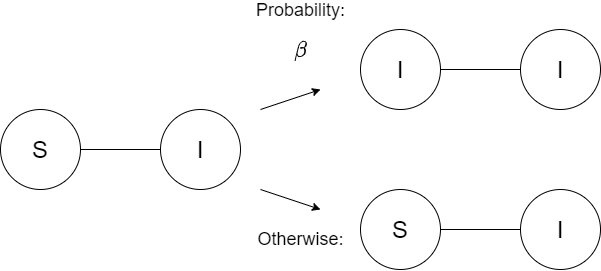

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

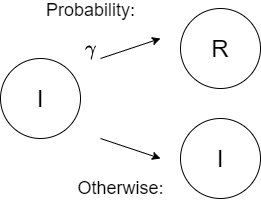

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups (These *are* graded)

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

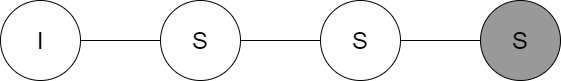

- What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  

- What is the exact probability that the leftmost node is still infected at this time?  

**Markdown for Part A**:

1.) $\beta^3$ 

2.) (1 - $\gamma)^3$

**Part B**: Use your named distributions.
- Each of the prior 2 questions is exactly described by one of the named variables covered in class.  Which variable, at what value(s) are we evaluating its pdf, and what is its parameter?
- What is the average (mean) recovery time for an infected person?
- Suppose an `S` node has exactly 4 `I` neighbors, and the probability of transmission is $\beta=0.5$.  What is the exact probability that that $S$ node is infected in the next time step?

**Markdown for Part B**:

1.a) Is a Binomial Distribution, where we are counting the number of successes ($\beta$) in 3 tries.  Where $\beta$ is the probability of success.

1.b) Is a Bernoulli Distribution,  where the likely hood of staying infected is (1-$\gamma$).  $\gamma$ being the likeyly hood of recovery.

2.) $\frac{1}{\gamma}$

3.) $1-(1-\beta)^n$ 

Where n=number of neighbors

$1-(1-.5)^4$ = Infection Rate,  (4,.5) so  $ = .9375$

**Part C**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

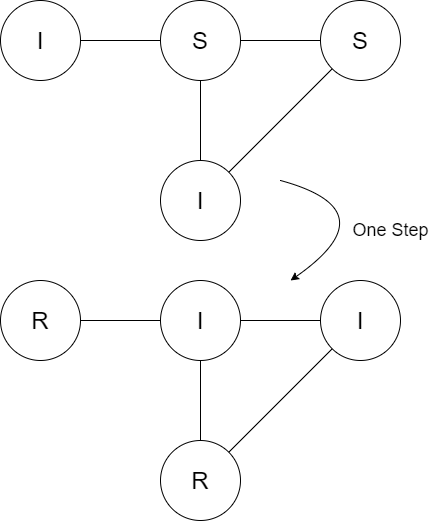

- What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  

Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Markdown for Part C**:

C.) 

(P of middle node getting infected)*(left node recovering)*(Bottom Node Recovering)*(Right Node getting infected)

($1-(1-\beta)^2)*\gamma*\gamma*\beta$

### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

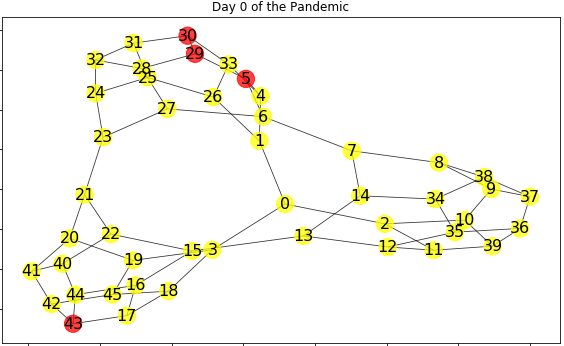

For your convenience, the two most common ways to represent this are listed below.  `edges` contains a list of each of the edges of the graph, and `neighbors` is a dictionary that contains the neighbors of each node (as a list of connected nodes).

`nodes` holds the 46 vertices, labelled by their indexes 0 through 45.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [6]:
#manual edge assignments
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

#create a dictionary as option
nodes = list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)
#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2, 3]
Node #  1  has neighbors of  [0, 4, 26]
Node #  2  has neighbors of  [0, 10, 11]
Node #  3  has neighbors of  [0, 18, 19]
Node #  4  has neighbors of  [1, 5, 33]
Node #  5  has neighbors of  [4, 6, 29]
Node #  6  has neighbors of  [5, 7, 27]
Node #  7  has neighbors of  [6, 8, 14]
Node #  8  has neighbors of  [7, 9, 38]
Node #  9  has neighbors of  [8, 10, 37]
Node #  10  has neighbors of  [2, 9, 39]
Node #  11  has neighbors of  [2, 12, 39]
Node #  12  has neighbors of  [11, 13, 35]
Node #  13  has neighbors of  [12, 14, 15]
Node #  14  has neighbors of  [7, 13, 34]
Node #  15  has neighbors of  [13, 16, 22]
Node #  16  has neighbors of  [15, 17, 44]
Node #  17  has neighbors of  [16, 18, 43]
Node #  18  has neighbors of  [3, 17, 45]
Node #  19  has neighbors of  [3, 20, 45]
Node #  20  has neighbors of  [19, 21, 41]
Node #  21  has neighbors of  [20, 22, 23]
Node #  22  has neighbors of  [15, 21, 40]
Node #  23  has neighbors of  [21, 24, 27]
No

**Part D:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.


In [7]:
def SIR_step(initial_state, gamma, beta):
    #Your code here
    #Loop through each node
    #print(gamma,beta)
    
    new_state = np.array(['']*46)
    counter = -1
    for i in initial_state:
        counter += 1
        if (i == 'S'): #sus node
            totI = 0
            currNeighbors = neighbors[counter]
            for j in currNeighbors:#looping neighbors
                #print(initial_state[j])
                if initial_state[j] == 'I':#found neighboring I
                    totI+=1 #Total neighbor infections increase 
            if(np.random.uniform(0,1) < (1-((1-beta)**totI))):
                new_state[counter]='I'
            else:
                new_state[counter]='S'
        if(i == 'I'):
            if((np.random.uniform(0,1) < gamma)):
                new_state[counter]='R'
            else:
                new_state[counter]='I'
        if(i=='R'):
            new_state[counter]='R'
    #make a new empty list to track changes
        #If S, 
            #loop its neighbors to find how many I it is touching
            #if (1-(1-gamma)**number of I)
        #If I 
            #if rand()>beta
            #I=R
    #set new list to initial state
    
    return(new_state)
#print(neighbors[0][0])
#print(np.random.uniform(0,1))

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [8]:
#Check your code is working for those trivial cases:

states=np.array(['S']*46)
infected_states=set([5,29,30, 43])

for idx in infected_states:
    states[idx]='I'
    
    
print("Gamma/Beta = 0")
print(SIR_step(states, 0, 0))




states=np.array(['S']*46)

print()
print("No I nodes : ")
print(SIR_step(states, .5, .5))


Gamma/Beta = 0
['S' 'S' 'S' 'S' 'S' 'I' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'I' 'I' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'I' 'S' 'S']

No I nodes : 
['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S']


**Part E:**

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is such that nodes 5,29,30, and 43 are infected and the rest are susceptible.  Code for this is given below.

Now we want to create a function or a loop that runs **SIR_step** for 100 time steps.  

At the end of 100 steps, we will return only a tuple of two integers.  First, the total number of nodes that were infected over the course of the epidemic; and second, and the total days spent infected across all nodes.  These are two good measures of the severity of the epidemic!  When we take 100 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 100-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Implement a function **SIR_sim(intial_state, gamma, beta, n_steps)** that takes *many* step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.  It should return the tuple of **(days_lost,people_infected)**

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.
* **n_steps** is the number of steps.  It can be defaulted as 100.
* The return **days_lost** is the number of cumulative days all people were infected.  After each call to **SIR_step**, you should increment this amount by the number of `I` entries in your state vector.
* The return **people_infected** is the number of people that were infected into state `I` at any point in the simulation.


In [9]:
#given initialization; 'states' has 42 'S' nodes and 4 'I' nodes
states=np.array(['S']*46)
infected_states=set([5,29,30,43])

for idx in infected_states:
    states[idx]='I'

def SIR_sim(gamma, beta, initial_state=states, n_steps=100):
    #do the thing!
    days_lost = 0
    people_infected = 0
    old_state = []    
    
    for y in initial_state:
        if y == 'I':
            people_infected+=1
            days_lost+=1
    
    
    for p in range(n_steps):

        old_state = initial_state
        initial_state = SIR_step(initial_state, gamma, beta)
        
        counter2=-1
        
        for i in initial_state:
            if i == 'I':
                days_lost+=1
        
        for k in initial_state:
            counter2+=1
            if ((k == 'I') & (old_state[counter2] == 'S')):
                people_infected+=1
                
                
    #for n_steps steps
        #take an SIR step
        #record how many additional days were lost
    #once done, see how many people got infected?
    return days_lost, people_infected

**SIDE NOTE!!!!!**

In part E I included the initial infected in my people_infected,  if i was not supposed to do this I would not of done the initial counting loop of initial_state.


**Part F:**

Run your function in part D 100 times (so you'll have 100 instances of 100 time steps) *each* for 3 different sets of values of the constants $\gamma$ and $\beta$.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.15.
* Second, when $\beta=0.1$ and $\gamma=0.2$.
* Finally, when $\beta=0.2$ and $\gamma=0.1$.

For each one of those 3 sets of experiments, report the average number of people infected and average number of days lost to infection.

Sanity checks: 
- Person count should be at least 4, possibly up to 46.
- Days lost could be as low as 0 if everybody recovers on day 1, possibly approaching $46\cdot 100$ if everybody is infected all 100 days.

In [10]:
#recommended output style:
gamma = .15
beta= .15
totdays = 0
totInf = 0
for x in range(100):
    days_lost,people_infected = SIR_sim(gamma,beta)
    totdays += days_lost
    totInf += people_infected
    days_lost = totdays/100
    people_infected = totInf/100
print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')


gamma = .2
beta= .1
totdays = 0
totInf = 0
for x in range(100):
    days_lost,people_infected = SIR_sim(gamma,beta)
    totdays += days_lost
    totInf += people_infected
    days_lost = totdays/100
    people_infected = totInf/100
print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')


gamma = .1
beta= .2
totdays = 0
totInf = 0
for x in range(100):
    days_lost,people_infected = SIR_sim(gamma,beta)
    totdays += days_lost
    totInf += people_infected
    days_lost = totdays/100
    people_infected = totInf/100
print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')

For beta= 0.15  and gamma= 0.15  lost 154.38  days between  23.65  people
For beta= 0.1  and gamma= 0.2  lost 59.57  days between  11.93  people
For beta= 0.2  and gamma= 0.1  lost 401.34  days between  40.22  people


**Part G:**

What does a Vaccine do?  You should have found that the settings of $\beta=0.2$ and $\gamma=0.1$ typically caused the most dangerous pandemic.  These numbers represent a disease that takes on average around 10 time steps (days) to recover from, and is highly infectious in that period: numbers reasonable for current COVID-19 data.  

But suppose we have access to a vaccine, and when a person take a vaccine they are immediately set to be type `R` removed nodes.  We want to investigate the effects of a vaccine and whether or not our model can capture the idea of "herd" immunity, where sufficient vaccination imbues protections on the unvaccinated.

Suppose *before* the start of your SIR_sim you take exactly $k$ of the 42 `S` individuals and reclassify them as `R`, representing individuals who have been innoculated against infection.  Keep the same 4 infected people at the start of each run.  Run 50 simulations *each* for the values of $k=[0,4,8,12,...,40]$ for a total of 11 additional sets of simulations.

For each one of those 11 sets of experiments, save the average number of people infected and average number of days lost to infection.  

It should be clear that vaccination helps those that *are* vaccinated, but does it help the unvaccinated as well?  After your study of $k$, create a pair of side-by-side plots.  

- In the first, make the $x$-axis is $k$ and the $y$-axis the average number of days lost.
- In the second, again make the $x$-axis is $k$ and make the $y$-axis the average *proportion of initial `S` states* infected.
- Do there appear to be any values of $k$ which lead to larger decreases than others?  Which ones? 

In [11]:
states=np.array(['S']*46)
infected_states=set([5,29,30,43])

for idx in infected_states:
    states[idx]='I'

klist = []
dayList = []
infList = []
for k in range(0,11):
    for idi in klist:
        states[idi]='R' #Choosing random spots to put vaccinated people
        
    #print(states)
    totdays=0
    totInf = 0
    for x in range(50):
        days_lost,people_infected = SIR_sim(.1,.2,states)
        totdays += days_lost
        totInf += people_infected
        days_lost = totdays/50
        people_infected = totInf/50
    dayList.append(days_lost)
    infList.append(people_infected)
    print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people', 'With ', (k*4), 'Random People Vaccinated')    
        
    for _ in range(0,4):
        r=np.random.randint(0,45)
        if r not in klist: klist.append(r)
        
    #print(klist)
    

For beta= 0.2  and gamma= 0.1  lost 390.26  days between  39.42  people With  0 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 340.54  days between  33.42  people With  4 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 267.2  days between  26.78  people With  8 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 173.76  days between  17.34  people With  12 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 61.8  days between  6.34  people With  16 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 76.16  days between  6.88  people With  20 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 7.94  days between  1.0  people With  24 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 9.7  days between  1.0  people With  28 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 9.68  days between  1.0  people With  32 Random People Vaccinated
For beta= 0.2  and gamma= 0.1  lost 10.36  days between  1.0  people

Text(0.5, 1.0, 'People Infected v Vaccinated population')

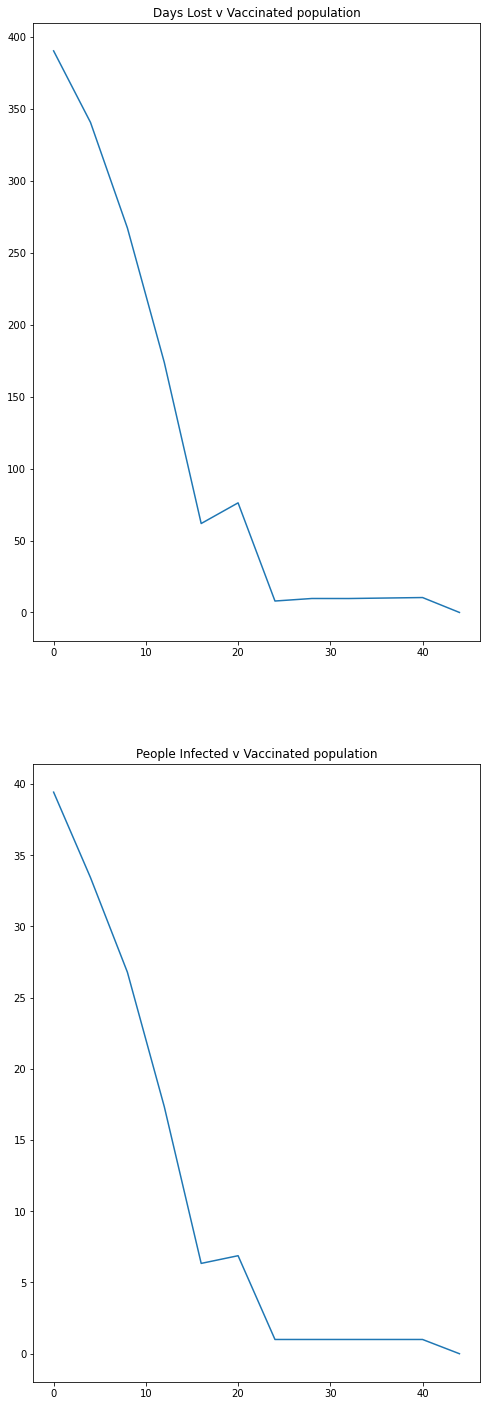

In [12]:
#plots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,25))
axs[0].plot([0,4,8,12,16,20,24,28,32,40,44],dayList)
axs[0].set_title("Days Lost v Vaccinated population")
axs[1].plot([0,4,8,12,16,20,24,28,32,40,44],infList)
axs[1].set_title("People Infected v Vaccinated population")


**Part H:**

Comment on anything you found interesting or unusual.

Really the only thing that is unusual is the bump at around k=26.  This could be caused by a lot of things, such as the seeding of where the vaccinated people are to the seeding of spread rates.  

Around 32-36 the number of infections pretty much bottoms out, where it's nearly impossible for the initially infected to spread the virus to others, as everyone around them is already recovered.  This is pretty much what people mean when talking about her immunity, however in this simulation, 80%+ of the population is vaccinated and is incredibly simple compared to the real world.


Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.  This is pretty relevant for COVID-19, because current data suggest a long-term decline in antibodies whether they came from infection or from a vaccine, so we might want `R` node status to "wear off" after a while, or allow for a lesser but non-zero probability of infection from an `I` node.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check out the CS department's course offerings by Aaron Clauset, Dan Larremore, and others for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>

### Appendix: Graph plotting code

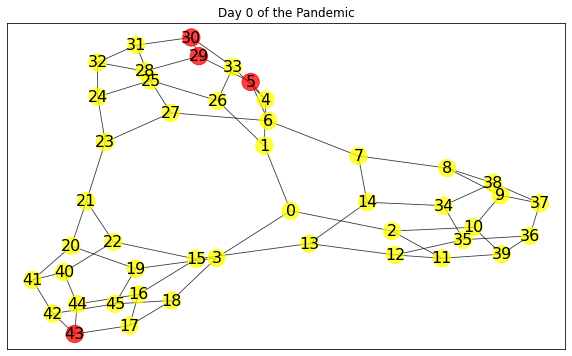

In [13]:
#here's the code to generate the given plot.  It is not needed for any of your tasks,
#...but if you're interested in including some visualizations in your analysis in parts F/G you can start with this!
#create the graph in networkx
import networkx as nx

#NB: this is a well known graph known as the "Tutte" graph
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

nodes=list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])

G=nx.Graph()
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

np.random.seed(3022)
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations; it saves the xy coords of each vertex

infected=set([5,29,30, 43])
sus=set(range(46))-infected

colorf=lambda x: 'red' if (x in infected) else ('yellow' if x in sus else 'green')
colors=[colorf(node) for node in nodes]
labels=dict(zip(range(46),range(46))); #label 0-45

fig, ax=plt.subplots(figsize=(10,6))
#draw the nodes, using xy-node layout 'pos' provided
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=300, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.8); #draw edges, using xy-node layout provided
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
ax.set_title('Day 0 of the Pandemic');